## <span style="color:orange">Techniques: </span>
- Decision tree
- Random Forest tree
- Gaussian Naive Bayes
- Logistic Regression

### <span style="color:purple">Dataset: **Wine Quality Prediction !**</span>

### <span style="color:red">Problem: **Classification**</span>

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

In [1]:
# import Dataset !
import pandas as pd

df = pd.read_csv('red_wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


 ### Missing Values

In [2]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 ### Numerical Features

In [4]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


 ### Discrete Variable 

In [5]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 1


['quality']

 ### Continous Variable

In [6]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature ]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 11


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [7]:
df[continous_Feature].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


 ### Categorical feature

In [8]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

0


[]

In [9]:
df[categorical_feature].head()

""
0
1
2
3
4


In [10]:
X = df.drop('quality', axis=1)
y = df[['quality']]

In [11]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [12]:
y.head(2)

,quality
0,5
1,5


In [13]:
y['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### <span style="color:cyan">Step: 02</span>: Data Normalize

In [14]:
# transformation !
from sklearn.preprocessing import MinMaxScaler

feature = X.columns
scaling = MinMaxScaler()
df[feature] = scaling.fit_transform(df[feature])
X = df[feature]
X.head(3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385


### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
# plots !
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
print("Before Cleaning:", df.shape)

Before Cleaning: (1599, 12)


***

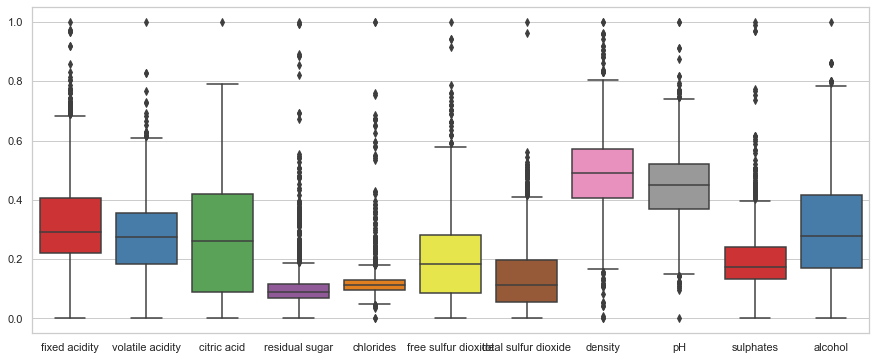

In [18]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=X,
            palette="Set1")
plt.show()            

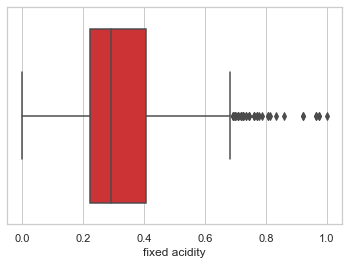

In [19]:
# fixed acidity

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="fixed acidity",
            palette="Set1")
plt.show()            

In [20]:
df = df[df['fixed acidity']<0.63] 


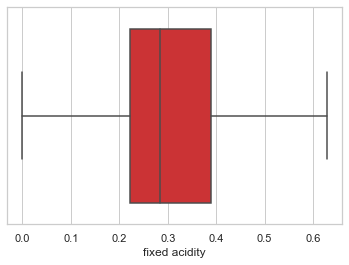

In [21]:
# fixed acidity

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="fixed acidity",
            palette="Set1")
plt.show()            

In [22]:
df.shape

(1518, 12)

***

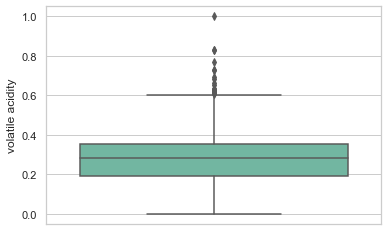

In [23]:
# volatile acidity

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="volatile acidity",
            palette="Set2")
plt.show()            

In [24]:
df = df[df['volatile acidity']<0.59] 


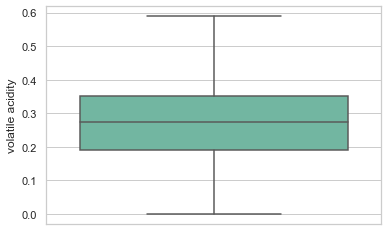

In [25]:
# mean_texture

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="volatile acidity",
            palette="Set2")
plt.show()            

In [26]:
df.shape

(1494, 12)

***

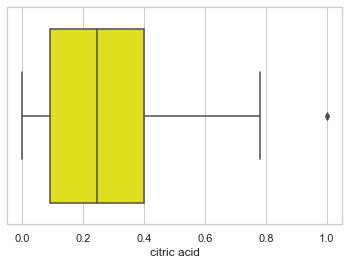

In [27]:
# citric acid

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="citric acid",
            color="yellow")
plt.show()            

In [28]:
df = df[df['citric acid']<0.98]

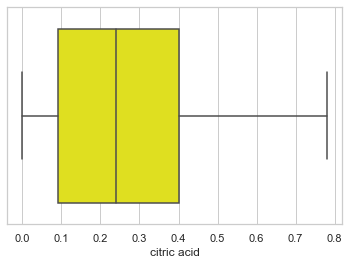

In [29]:
# citric acid

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="citric acid",
            color="yellow")
plt.show()            

In [30]:
df.shape

(1493, 12)

***

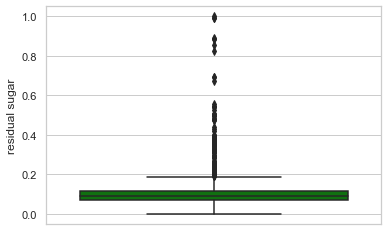

In [31]:
# residual sugar

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="residual sugar",
            color="green")
plt.show()            

In [32]:
df = df[df['residual sugar']<0.155]

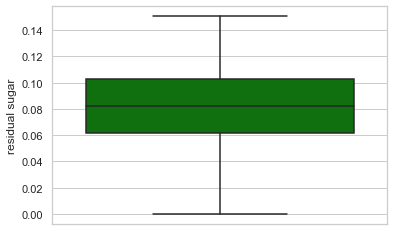

In [33]:
# residual sugar

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="residual sugar",
            color="green")
plt.show()            

In [34]:
df.shape

(1308, 12)

***

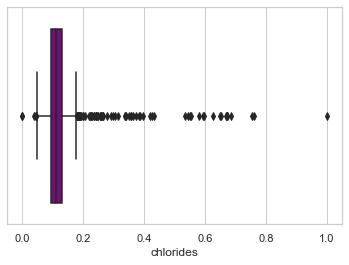

In [35]:
# chlorides

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="chlorides",
            color="purple")
plt.show()            

In [36]:
df = df[df['chlorides']>0.07]
df = df[df['chlorides']<0.16]


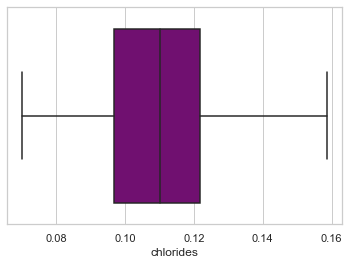

In [37]:
# chlorides

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="chlorides",
            color="purple")
plt.show()            

In [38]:
print("After Cleaning:", df.shape)

After Cleaning: (1118, 12)


***

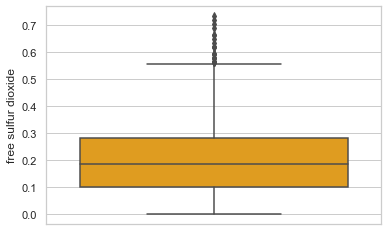

In [39]:
# free sulfur dioxide

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="free sulfur dioxide",
            color="orange")
plt.show()            

In [40]:
df = df[df['free sulfur dioxide']<0.55]


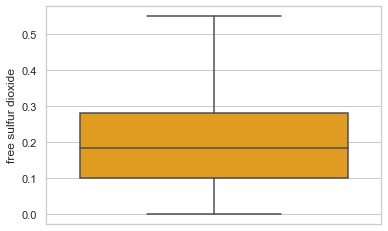

In [41]:
# free sulfur dioxide     

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="free sulfur dioxide",
            color="orange")
plt.show()            

In [42]:
print("After Cleaning:", df.shape)

After Cleaning: (1094, 12)


***

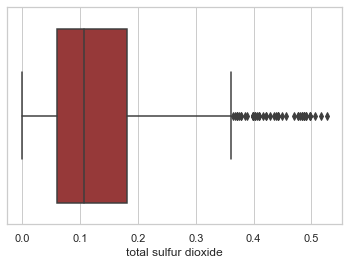

In [43]:
# total sulfur dioxide

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="total sulfur dioxide",
            color="brown")
plt.show()            

In [44]:
df = df[df['total sulfur dioxide']<0.31]


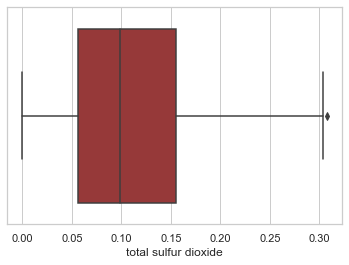

In [45]:
# total sulfur dioxide     

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="total sulfur dioxide",
            color="brown")
plt.show()            

In [46]:
print("After Cleaning:", df.shape)

After Cleaning: (1005, 12)


***

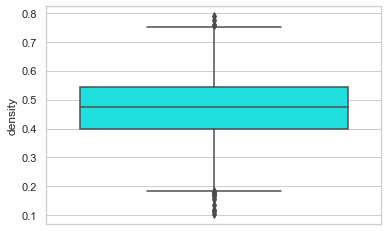

In [47]:
# density                 

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="density",
            color="cyan")
plt.show()            

In [48]:
df = df[df['density']<0.75]
df = df[df['density']>0.19]


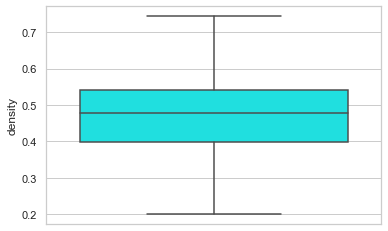

In [49]:
# density     

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="density",
            color="cyan")
plt.show()            

In [50]:
print("After Cleaning:", df.shape)

After Cleaning: (989, 12)


***

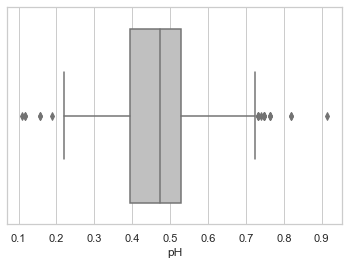

In [51]:
# pH                                       

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="pH",
            color="silver")
plt.show()            

In [52]:
df = df[df['pH']<0.72]
df = df[df['pH']>0.2]


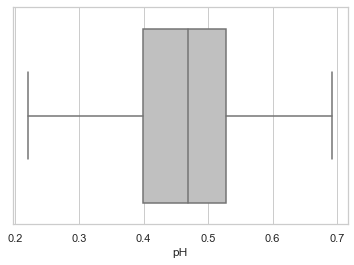

In [53]:
# pH     

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="pH",
            color="silver")
plt.show()                      

In [54]:
print("After Cleaning:", df.shape)

After Cleaning: (968, 12)


***

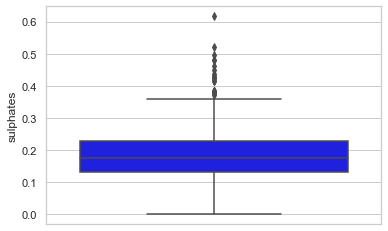

In [55]:
# sulphates                                           

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="sulphates",
            color="blue")
plt.show()            

In [56]:
df = df[df['sulphates']<0.35]

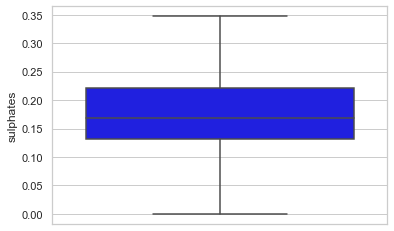

In [57]:
# sulphates     

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="sulphates",
            color="blue")
plt.show()            

In [58]:
print("After Cleaning:", df.shape)

After Cleaning: (939, 12)


***

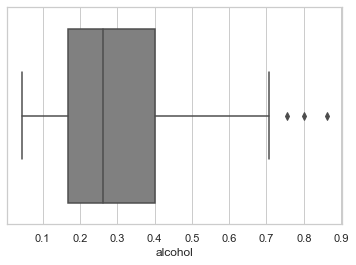

In [59]:
# alcohol                                       

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="alcohol",
            color="gray")
plt.show()            

In [60]:
df = df[df['alcohol']<0.72]


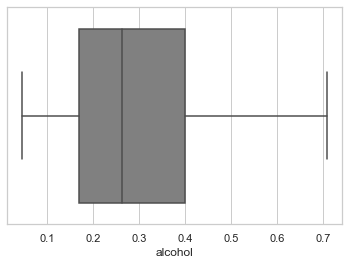

In [61]:
# alcohol     

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="alcohol",
            color="gray")
plt.show()                      

In [62]:
print("After Cleaning:", df.shape)

After Cleaning: (936, 12)


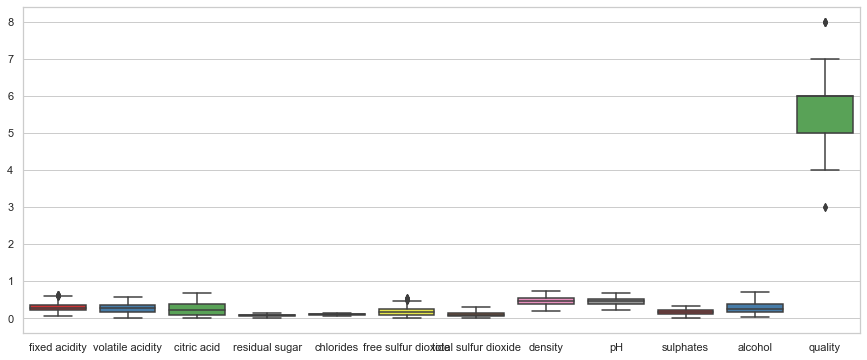

In [63]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            palette="Set1")
plt.show()            

***

 ## Model Building

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***

### <span style="color:cyan">Step: 05</span>: Techniques !

## Decision tree Technique !

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model


DecisionTreeClassifier()

### Evaluate or Test Model Accuracy

In [66]:
predicted_values = dt_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

dt_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Decision tree:",dt_score)


Decision tree: 68.44


***

***

## Random Forest tree !

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model


C:\Users\fahad\AppData\Local\Temp\ipykernel_904\4111477682.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier().fit(X_train, y_train)


RandomForestClassifier()

### Evaluate or Test Model Accuracy

In [68]:
predicted_values = rf_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

rf_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Random Forest:", rf_score)


Random Forest: 70.94


***

***

## Gaussian Naive Bayes !

In [69]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Evaluate or Test Model Accuracy

In [70]:
predicted_values = gnb_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

gnb_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("GaussianNB:", gnb_score)


GaussianNB: 54.06


***

## Predict Results Score

###  Compare the Results of Models

In [71]:
data={'Decesion Tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian Naive Bayes'     :[gnb_score]
}

In [72]:
Evaluation =pd.DataFrame(data, index=['SCORE'])
Evaluation

,Decesion Tree,Random Forest,Gaussian Naive Bayes
SCORE,68.44,70.94,54.06


***